<a href="https://colab.research.google.com/github/mazprimrez/capstoneprojectDS/blob/master/Capstone%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
This Notebook will be used for capstone project, a data science specialization by IBM on Coursera

In [61]:
import numpy as np
import pandas as pd

# The Data

In [62]:
dataset = pd.read_csv("https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv")

In [63]:
dataset.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,2020/01/19 00:00:00+00,1/19/2020 9:01:00 AM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,NaN,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2005/04/11 00:00:00+00,4/11/2005 6:31:00 PM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,0,Raining,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,,NaN,2,Injury Collision,Head On,2,0,0,2,1,0,0,2013/03/31 00:00:00+00,3/31/2013 2:09:00 AM,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,,NaN,2,Injury Collision,Pedestrian,3,1,0,1,1,0,0,2020/01/06 00:00:00+00,1/6/2020 5:55:00 PM,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,NaN,NaN,2,Injury Collision,Other,2,0,0,1,1,0,0,2009/12/25 00:00:00+00,12/25/2009 7:00:00 PM,Mid-Block (not related to intersection),28.0,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,0,Clear,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


In [64]:
dataset.shape

(221738, 40)

# Data Cleaning

There are NaN value that filled with ' ' and 
'unknown' instead.

In [65]:
str_cols = dataset.select_dtypes(['object']).columns
dataset[str_cols] = dataset[str_cols].replace(' ',np.nan).replace('Unknown',np.nan)

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214260 non-null  float64
 1   Y                214260 non-null  float64
 2   OBJECTID         221738 non-null  int64  
 3   INCKEY           221738 non-null  int64  
 4   COLDETKEY        221738 non-null  int64  
 5   REPORTNO         221738 non-null  object 
 6   STATUS           221738 non-null  object 
 7   ADDRTYPE         218024 non-null  object 
 8   INTKEY           72027 non-null   float64
 9   LOCATION         217145 non-null  object 
 10  EXCEPTRSNCODE    11785 non-null   object 
 11  EXCEPTRSNDESC    11785 non-null   object 
 12  SEVERITYCODE     221737 non-null  object 
 13  SEVERITYDESC     200081 non-null  object 
 14  COLLISIONTYPE    195287 non-null  object 
 15  PERSONCOUNT      221738 non-null  int64  
 16  PEDCOUNT         221738 non-null  int6

In [67]:
dataset.isna().sum().sort_values()

INJURIES                0
SEGLANEKEY              0
INCDTTM                 0
INCDATE                 0
FATALITIES              0
SERIOUSINJURIES         0
CROSSWALKKEY            0
VEHCOUNT                0
PEDCYLCOUNT             0
PEDCOUNT                0
PERSONCOUNT             0
HITPARKEDCAR            0
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
SEVERITYCODE            1
SDOT_COLDESC            1
SDOT_COLCODE            1
ADDRTYPE             3714
LOCATION             4593
X                    7478
Y                    7478
JUNCTIONTYPE        12000
SEVERITYDESC        21657
UNDERINFL           26431
COLLISIONTYPE       26451
ST_COLDESC          26451
ST_COLCODE          26451
LIGHTCOND           40263
ROADCOND            41699
WEATHER             41772
SDOTCOLNUM          94533
INTKEY             149711
INATTENTIONIND     191550
EXCEPTRSNDESC      209953
EXCEPTRSNCODE      209953
SPEEDING    

In this section I will delete some features such as features with NaN values more than 50k, features with desc values that already described by code, and ID number.

In [68]:
rem_col = dataset.isna().sum()[dataset.isna().sum().sort_values() > 50000].index

In [69]:
a = [col for col in dataset.columns if col not in rem_col]
a = [col for col in dataset[a].columns if col not in np.array(['SEVERITYCODE.1','LOCATION','SEVERITYDESC','INCDATE','INCDTTM',
                                                            'SDOT_COLDESC','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','OBJECTID','INCKEY',
                                                            'COLDETKEY','REPORTNO','STATUS'])]

In [70]:
df = dataset[a]
df = df[df.SEVERITYCODE.isna()==False] #remove NaN value in label
df = df[df.SEVERITYCODE!='0']
df.head()

,X,Y,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,-122.356511,47.517361,Intersection,1,Angles,2,0,0,2,0,0,0,At Intersection (intersection related),11.0,N,Clear,Dry,Daylight,10,N
1,-122.361405,47.702064,Block,1,Rear Ended,2,0,0,2,0,0,0,Mid-Block (not related to intersection),14.0,0,Raining,Wet,Dusk,13,N
2,-122.317414,47.664028,Block,2,Head On,2,0,0,2,1,0,0,Mid-Block (not related to intersection),11.0,N,Clear,Dry,Dark - Street Lights On,30,N
3,-122.318234,47.619927,Intersection,2,Pedestrian,3,1,0,1,1,0,0,At Intersection (intersection related),24.0,N,Raining,Wet,Dark - Street Lights On,0,N
4,-122.351724,47.560306,Block,2,Other,2,0,0,1,1,0,0,Mid-Block (not related to intersection),28.0,0,Clear,Ice,Dark - Street Lights On,50,N


In [71]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

X: [-122.35651081 -122.36140492 -122.31741361 ... -122.28073397 -122.2807745
 -122.35958574]
Y: [47.5173613  47.70206353 47.66402754 ... 47.55783671 47.55156407
 47.65958298]
ADDRTYPE: ['Intersection' 'Block' nan 'Alley']
SEVERITYCODE: ['1' '2' '2b' '3']
COLLISIONTYPE: ['Angles' 'Rear Ended' 'Head On' 'Pedestrian' 'Other' 'Cycles'
 'Parked Car' 'Left Turn' 'Sideswipe' 'Right Turn' nan]
PERSONCOUNT: [ 2  3  0  1  7  5  6  4  8 16 25 12 11 17  9 22 26 13 10 37 28 36 14 19
 53 30 29 23 44 15 32 21 20 41 27 35 43 81 18 48 24 34 57 47 39 31 54 93]
PEDCOUNT: [0 1 2 3 4 5 6]
PEDCYLCOUNT: [0 1 2]
VEHCOUNT: [ 2  1  3  4  0  7  5  6  8 11  9 14 10 12 13 15]
INJURIES: [ 0  1  3  2  5  4  6  7  8 11  9 13 10 12 15 78]
SERIOUSINJURIES: [ 0  1  2  3  5  4 41]
FATALITIES: [0 2 1 4 3 5]
JUNCTIONTYPE: ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)'
 'Mid-Block (but intersection related)' 'Driveway Junction'
 'At Intersection (but not related to intersection)' nan 'R

In [72]:
df.isna().sum()

X                   5409
Y                   5409
ADDRTYPE            1933
SEVERITYCODE           0
COLLISIONTYPE       4796
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INJURIES               0
SERIOUSINJURIES        0
FATALITIES             0
JUNCTIONTYPE        6392
SDOT_COLCODE           0
UNDERINFL           4776
WEATHER            20118
ROADCOND           20045
LIGHTCOND          18609
ST_COLCODE          4796
HITPARKEDCAR           0
dtype: int64

In [73]:
df[a].shape

(200081, 20)

For UNDERINFL feature, the value seems weird, so I will change '1' to Y and '0' to 'N'

In [74]:
df['UNDERINFL'] = df['UNDERINFL'].replace(['1','0'],['Y','N'])

The Number of each category of severity code:

In [75]:
df

,X,Y,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,-122.356511,47.517361,Intersection,1,Angles,2,0,0,2,0,0,0,At Intersection (intersection related),11.0,N,Clear,Dry,Daylight,10,N
1,-122.361405,47.702064,Block,1,Rear Ended,2,0,0,2,0,0,0,Mid-Block (not related to intersection),14.0,N,Raining,Wet,Dusk,13,N
2,-122.317414,47.664028,Block,2,Head On,2,0,0,2,1,0,0,Mid-Block (not related to intersection),11.0,N,Clear,Dry,Dark - Street Lights On,30,N
3,-122.318234,47.619927,Intersection,2,Pedestrian,3,1,0,1,1,0,0,At Intersection (intersection related),24.0,N,Raining,Wet,Dark - Street Lights On,0,N
4,-122.351724,47.560306,Block,2,Other,2,0,0,1,1,0,0,Mid-Block (not related to intersection),28.0,N,Clear,Ice,Dark - Street Lights On,50,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221732,-122.334832,47.522784,Block,2,Rear Ended,3,0,0,2,2,0,0,Mid-Block (but intersection related),14.0,N,Clear,Dry,Dark - Street Lights On,14,N
221734,-122.379619,47.668051,Block,1,Sideswipe,2,0,0,2,0,0,0,Mid-Block (not related to intersection),11.0,N,Clear,Dry,Daylight,71,N
221735,-122.312837,47.526850,Intersection,2,Angles,3,0,0,2,3,0,0,At Intersection (intersection related),11.0,N,Clear,Dry,Daylight,10,N
221736,-122.285051,47.567923,Intersection,2,Angles,3,0,0,2,2,0,0,At Intersection (intersection related),11.0,N,Clear,Dry,Daylight,10,N


In [76]:
df.SEVERITYCODE.value_counts()

1     137776
2      58842
2b      3111
3        352
Name: SEVERITYCODE, dtype: int64

ST_COLCODE must be int not object

In [81]:
df['ST_COLCODE'] = df['ST_COLCODE'].astype('float')

# Exploratory Data Analysis

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

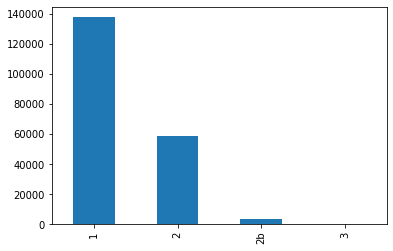

In [80]:
df.SEVERITYCODE.value_counts().plot(kind='bar')

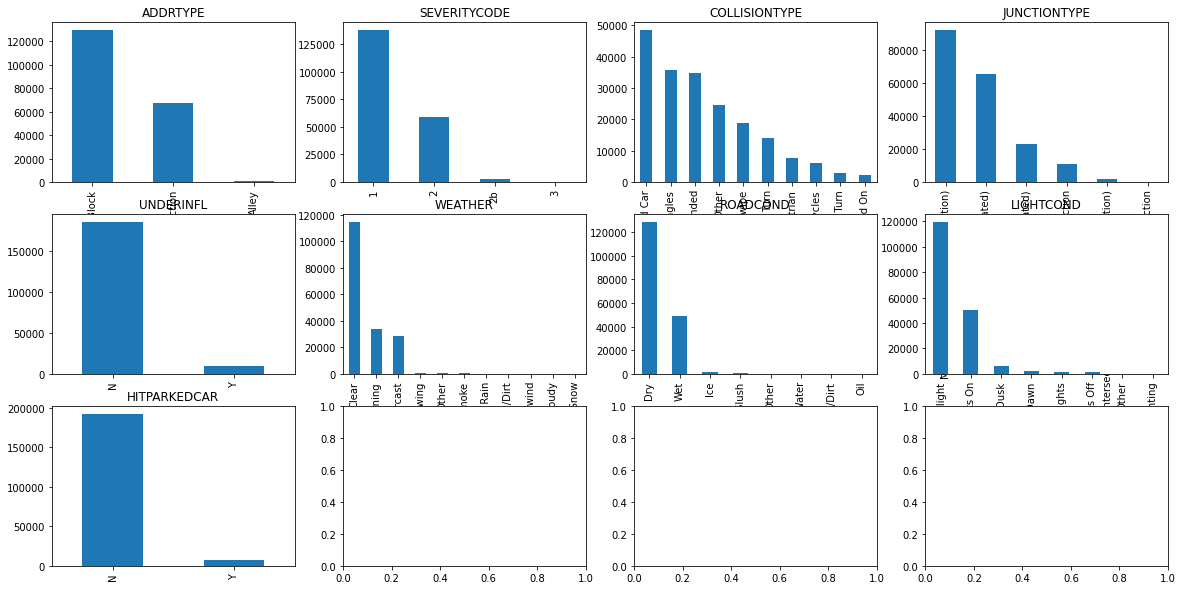

In [83]:
fig, axes = plt.subplots(3,4, figsize=(20,10))
axes = axes.flatten()

i = 0
for t in df.select_dtypes('object').columns:
    df[t].value_counts().plot(kind='bar', ax=axes[i], title=t)
    i +=1

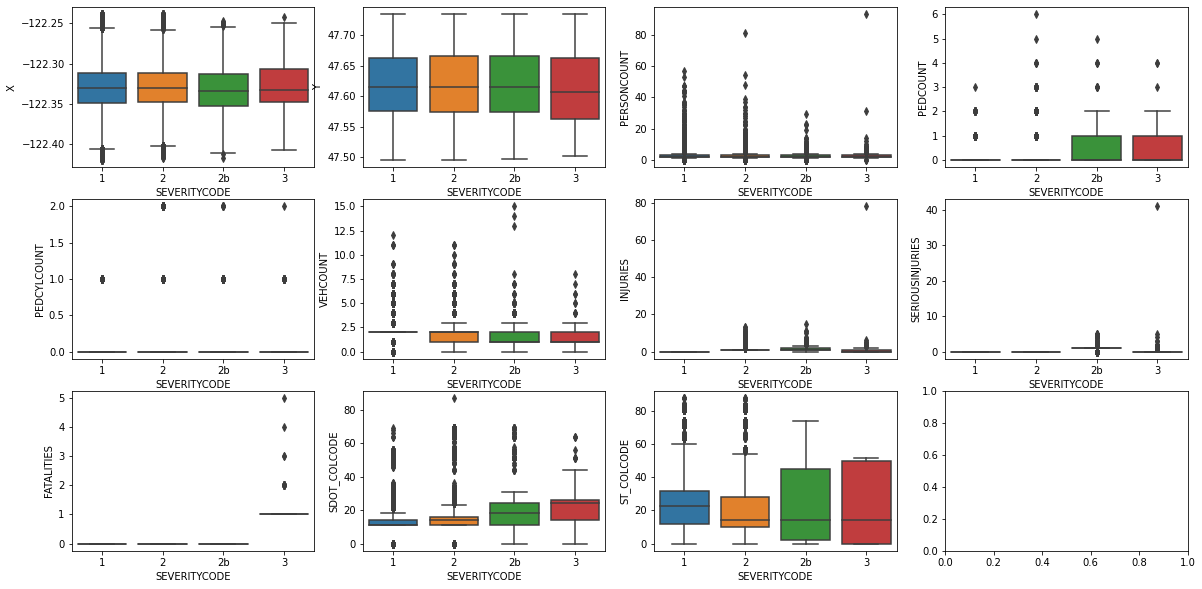

In [84]:
x_var = "SEVERITYCODE"
fig, axes = plt.subplots(3,4, figsize=(20,10))
axes = axes.flatten()

i = 0
for t in df.select_dtypes(['int','float']):
    ax = sns.boxplot(x=x_var, y=t, data=df, ax=axes[i])
    i +=1

# Encode Data
In this part, I will encode the categorical text data to int using OneHotEncoder by scikit-learn.

In [85]:
df.head()

,X,Y,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,-122.356511,47.517361,Intersection,1,Angles,2,0,0,2,0,0,0,At Intersection (intersection related),11.0,N,Clear,Dry,Daylight,10.0,N
1,-122.361405,47.702064,Block,1,Rear Ended,2,0,0,2,0,0,0,Mid-Block (not related to intersection),14.0,N,Raining,Wet,Dusk,13.0,N
2,-122.317414,47.664028,Block,2,Head On,2,0,0,2,1,0,0,Mid-Block (not related to intersection),11.0,N,Clear,Dry,Dark - Street Lights On,30.0,N
3,-122.318234,47.619927,Intersection,2,Pedestrian,3,1,0,1,1,0,0,At Intersection (intersection related),24.0,N,Raining,Wet,Dark - Street Lights On,0.0,N
4,-122.351724,47.560306,Block,2,Other,2,0,0,1,1,0,0,Mid-Block (not related to intersection),28.0,N,Clear,Ice,Dark - Street Lights On,50.0,N


In [86]:
df.isna().sum()

X                   5409
Y                   5409
ADDRTYPE            1933
SEVERITYCODE           0
COLLISIONTYPE       4796
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INJURIES               0
SERIOUSINJURIES        0
FATALITIES             0
JUNCTIONTYPE        6392
SDOT_COLCODE           0
UNDERINFL           4776
WEATHER            20118
ROADCOND           20045
LIGHTCOND          18609
ST_COLCODE          4796
HITPARKEDCAR           0
dtype: int64

In [87]:
df_clean = df[df['X'].isna()==False]

In [88]:
df_clean[df_clean.select_dtypes('int').columns] = df_clean.select_dtypes('int').fillna(-1)
df_clean = df[df['X'].isna()==False]
df_clean[df_clean.select_dtypes('float').columns] = df_clean.select_dtypes('float').fillna(-1)
df_clean[df_clean.select_dtypes('object').columns] = df_clean.select_dtypes('object').replace(np.nan,'Unknown')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [89]:
df_clean.isna().sum()

X                  0
Y                  0
ADDRTYPE           0
SEVERITYCODE       0
COLLISIONTYPE      0
PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
VEHCOUNT           0
INJURIES           0
SERIOUSINJURIES    0
FATALITIES         0
JUNCTIONTYPE       0
SDOT_COLCODE       0
UNDERINFL          0
WEATHER            0
ROADCOND           0
LIGHTCOND          0
ST_COLCODE         0
HITPARKEDCAR       0
dtype: int64

In [90]:
import seaborn as sns

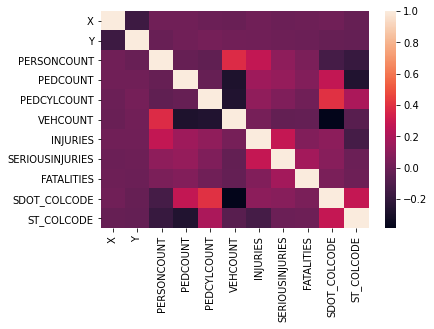

In [91]:
sns.heatmap(df_clean.corr())

In [92]:
Xdata = df_clean.drop(columns='SEVERITYCODE')
y = df_clean['SEVERITYCODE']

In [93]:
X = pd.get_dummies(Xdata, drop_first=True)

In [94]:
from sklearn import preprocessing
data_clean_scaled = preprocessing.StandardScaler().fit(X).transform(X)

In [95]:
print(f"After Delete the NaN values: {X.shape}")
print(f"Before delete the NaN values: {df.shape}")

After Delete the NaN values: (194672, 58)
Before delete the NaN values: (200081, 20)


# Modeling

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(data_clean_scaled,y, test_size=0.65, random_state=42, shuffle=True)

In [98]:
y_train.value_counts()/y_train.shape[0]

1     0.685199
2     0.297644
2b    0.015396
3     0.001761
Name: SEVERITYCODE, dtype: float64

## Testing the best ML Classfier Model
In this part I will use some of Classifier model such as SVM, KNN, Decision tree, etc., after that I will use Random Search method to search the best hyperparameter.

### Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, max_depth=50)

clf.fit(X_train, y_train)
print(f"Train accuracy: {clf.score(X_train, y_train)}")
print(f"Test accuracy: {clf.score(X_test, y_test)}")

Train accuracy: 0.999985323255302
Test accuracy: 0.9994468021211187


In [100]:
from sklearn.model_selection import RandomizedSearchCV

t = RandomForestClassifier()
params = {'max_depth': [None, 10,20, 50,80]}

rsearch = RandomizedSearchCV(estimator=t, param_distributions=params, cv=4, random_state=0)
rsearch.fit(X_train,y_train)

print(f"Best Parameter: {rsearch.best_params_}")
print(f"Best Score: {rsearch.best_score_}")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best Parameter: {'max_depth': None}
Best Score: 0.9993101927833338


In [101]:
clf = RandomForestClassifier(random_state=0, max_depth=rsearch.best_params_['max_depth'])

clf.fit(X_train, y_train)
print(f"Train accuracy: {clf.score(X_train, y_train)}")
print(f"Test accuracy: {clf.score(X_test, y_test)}")

Train accuracy: 0.999985323255302
Test accuracy: 0.9994468021211187


In [102]:
from sklearn.metrics import  classification_report
yhat = clf.predict(X_test)

In [103]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     86815
           2       1.00      1.00      1.00     37490
          2b       0.99      0.99      0.99      2009
           3       1.00      0.85      0.92       223

    accuracy                           1.00    126537
   macro avg       1.00      0.96      0.98    126537
weighted avg       1.00      1.00      1.00    126537



### Neural Networks

In [116]:
X_train.shape[1]

58

In [109]:
import tensorflow as tf
y_train_tf = tf.keras.utils.to_categorical(y_train.map({'1':0,'2':1,'2b':2,'3':3}), num_classes=4)
y_test_tf = tf.keras.utils.to_categorical(y_test.map({'1':0,'2':1,'2b':2,'3':3}), num_classes=4)

In [117]:
y_test_tf.shape

(126537, 4)

In [119]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(y_test_tf.shape[1]))

model.compile(optimizer="adam", loss="mse", metrics=['accuracy'])

model.fit(X_train, y_train_tf, epochs=100, batch_size=64)


Epoch 1/100
1065/1065 [==============================] - 3s 3ms/step - loss: 0.0205 - accuracy: 0.9905
Epoch 2/100
1065/1065 [==============================] - 3s 3ms/step - loss: 0.0021 - accuracy: 0.9988
Epoch 3/100
1065/1065 [==============================] - 3s 3ms/step - loss: 0.0012 - accuracy: 0.9989
Epoch 4/100
1065/1065 [==============================] - 3s 3ms/step - loss: 9.3476e-04 - accuracy: 0.9989
Epoch 5/100
1065/1065 [==============================] - 3s 3ms/step - loss: 7.5213e-04 - accuracy: 0.9989
Epoch 6/100
1065/1065 [==============================] - 3s 3ms/step - loss: 6.2711e-04 - accuracy: 0.9992
Epoch 7/100
1065/1065 [==============================] - 3s 3ms/step - loss: 5.2021e-04 - accuracy: 0.9992
Epoch 8/100
1065/1065 [==============================] - 3s 3ms/step - loss: 4.1888e-04 - accuracy: 0.9994
Epoch 9/100
1065/1065 [==============================] - 3s 3ms/step - loss: 4.8996e-04 - accuracy: 0.9994
Epoch 10/100
1065/1065 [=========================

In [120]:
yhat = model.predict(X_test)

In [121]:
ypred = [np.argmax(i) for i in yhat]
ypred = pd.Series(ypred).map({0:'1',1:'2',2:'2b',3:'3'})

In [122]:
print(classification_report(y_test.reset_index()['SEVERITYCODE'], ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     86815
           2       1.00      1.00      1.00     37490
          2b       1.00      0.99      0.99      2009
           3       1.00      0.99      1.00       223

    accuracy                           1.00    126537
   macro avg       1.00      0.99      1.00    126537
weighted avg       1.00      1.00      1.00    126537

